# Forest Fires Data Set 

## Analysis 

This study considers 517 cases of forest fire in the north east of Portugal. The time the fire occures, such as month of the year and day of the week is included in the dataset. It also records weather conditions including temperature (in Celsius degrees), wind (km/h) and rain (mm/m2). 

#### The following packages are needed for the study:

In [81]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [13]:
forest_fire = pd.read_csv("forestfires.csv")
forest_fire.tail(6)

,X,Y,month,day,temp,wind,rain,area
511,8,6,aug,sun,27.8,2.7,0.0,0.00
512,4,3,aug,sun,27.8,2.7,0.0,6.44
513,2,4,aug,sun,21.9,5.8,0.0,54.29
514,7,4,aug,sun,21.2,6.7,0.0,11.16
515,1,4,aug,sat,25.6,4.0,0.0,0.00
516,6,3,nov,tue,11.8,4.5,0.0,0.00


In [16]:
forest_fire.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


#### It is interesting to check the months and days that fire occurs most often. As expected, the fire occurs in hot periods of the year, like in August and September. It is also interesting  to note that fires happen on weekends. This can be expained by the fact that most people have leisure activities during the weekends, such as drinking and having BBQs, which causes a risk of fire to grow.

In [18]:
forest_fire["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [19]:
forest_fire["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

### Missing data


#### Before we carry out our analysis, we want to check if there are missing values in the dataset.from the area variabke with 0 values.

In [23]:
forest_fire.isna().sum()

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

#### The 138 missing values from the variable "area" will be replaced by 0. 

In [28]:
forest_fire["area"] = forest_fire["area"].fillna(0)

In [37]:
forest_fire.isna().sum()

X        0
Y        0
month    0
day      0
temp     2
wind     1
rain     0
area     0
dtype: int64

#### The rows that have missing values will be also removed from the dataset.

In [48]:
forest_fire.dropna(inplace = True)
forest_fire.shape

(514, 8)

## Data wrangling

#### The columns X and Y will be removed from the dataset.

In [60]:
forest_fire_new = forest_fire.drop(columns = ["X", "Y"] )
forest_fire_new

,month,day,temp,wind,rain,area
0,mar,fri,8.2,6.7,0.0,0.00
1,oct,tue,18.0,0.9,0.0,0.00
2,oct,sat,14.6,1.3,0.0,0.00
3,mar,fri,8.3,4.0,0.2,0.00
4,mar,sun,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...
512,aug,sun,27.8,2.7,0.0,6.44
513,aug,sun,21.9,5.8,0.0,54.29
514,aug,sun,21.2,6.7,0.0,11.16
515,aug,sat,25.6,4.0,0.0,0.00


#### The data frame it is arranged by area, so that the highest area fires are first

In [63]:
forest_fire_new.sort_values("area", ascending = False)

,month,day,temp,wind,rain,area
238,sep,sat,25.1,4.0,0.0,1090.84
415,aug,thu,27.5,4.9,0.0,746.28
479,jul,mon,22.6,4.9,0.0,278.53
237,sep,tue,18.8,2.2,0.0,212.88
236,sep,sat,18.2,1.8,0.0,200.94
...,...,...,...,...,...,...
117,mar,sat,15.2,4.9,0.0,0.00
116,mar,sat,11.6,6.3,0.0,0.00
115,mar,tue,15.5,6.3,0.0,0.00
114,mar,tue,15.8,7.6,0.0,0.00


#### And now remove all the zeros from the "area" varaible. Teh new data frame is stored in a data frame called, forest_fire_new_nonzero.

In [69]:
forest_fire_new_nonzero = forest_fire_new[forest_fire_new["area"] !=0]

#### Create a new column is_rain, which is equal to True whenever rain is greater than zero and False otherwise.

In [71]:
forest_fire_new_nonzero

,month,day,temp,wind,rain,area,is_rain
138,jul,tue,18.0,2.7,0.0,0.36,0.0
139,sep,tue,21.7,2.2,0.0,0.43,0.0
140,sep,mon,21.9,1.8,0.0,0.47,0.0
141,aug,wed,23.3,4.5,0.0,0.55,0.0
142,aug,fri,21.2,8.9,0.0,0.61,0.0
...,...,...,...,...,...,...,...
509,aug,fri,21.1,7.6,1.4,2.17,1.4
510,aug,fri,18.2,5.4,0.0,0.43,0.0
512,aug,sun,27.8,2.7,0.0,6.44,0.0
513,aug,sun,21.9,5.8,0.0,54.29,0.0


In [74]:
forest_fire_new_nonzero["is_rain"] = forest_fire_new_nonzero["rain"]
forest_fire_new_nonzero

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,month,day,temp,wind,rain,area,is_rain
138,jul,tue,18.0,2.7,0.0,0.36,0.0
139,sep,tue,21.7,2.2,0.0,0.43,0.0
140,sep,mon,21.9,1.8,0.0,0.47,0.0
141,aug,wed,23.3,4.5,0.0,0.55,0.0
142,aug,fri,21.2,8.9,0.0,0.61,0.0
...,...,...,...,...,...,...,...
509,aug,fri,21.1,7.6,1.4,2.17,1.4
510,aug,fri,18.2,5.4,0.0,0.43,0.0
512,aug,sun,27.8,2.7,0.0,6.44,0.0
513,aug,sun,21.9,5.8,0.0,54.29,0.0


## Group by and summarise

In [76]:
forest_fire_new_nonzero.groupby("month").mean()


,temp,wind,rain,area,is_rain
month,,,,,
apr,9.050000,6.025000,0.000000,20.005000,0.000000
aug,22.353061,4.148980,0.079592,23.441939,0.079592
dec,4.522222,7.644444,0.000000,13.330000,0.000000
feb,7.760000,4.560000,0.000000,12.550000,0.000000
jul,22.866667,3.583333,0.000000,25.546111,0.000000
jun,21.562500,4.537500,0.000000,12.412500,0.000000
mar,12.936842,4.868421,0.000000,12.382105,0.000000
may,18.000000,4.000000,0.000000,38.480000,0.000000
oct,18.120000,3.660000,0.000000,19.914000,0.000000


In [77]:
forest_fire_new_nonzero.groupby("day").mean()

,temp,wind,rain,area,is_rain
day,,,,,
fri,17.613953,4.569767,0.032558,10.400930,0.032558
mon,17.469231,4.153846,0.000000,18.116154,0.000000
sat,19.919048,3.750000,0.000000,51.068095,0.000000
sun,20.042553,4.380851,0.000000,20.424043,0.000000
thu,19.316129,3.880645,0.000000,32.164516,0.000000
tue,20.100000,4.175000,0.177778,22.438611,0.177778
wed,20.887097,3.706452,0.000000,18.642581,0.000000


## Plotting

In [86]:
forest_fire_new_nonzero["area"].plot(kind = "hist"(bins=100))
plt.show()


TypeError: 'str' object is not callable

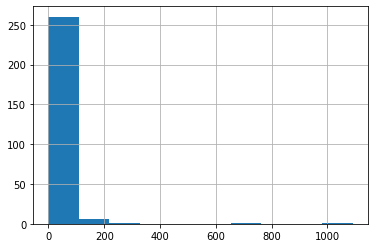

In [91]:
forest_fire_new_nonzero["area"].hist(bins=10)
plt.show()

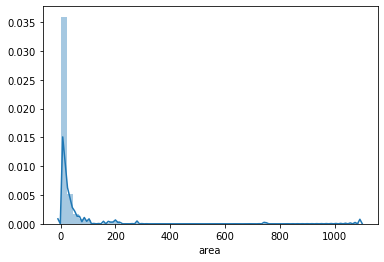

In [92]:
sns.distplot(forest_fire_new_nonzero['area'])
